In [1]:
import IPython.core.display as di;
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

# <center>Logistic</center>

## 基本原理

　　(1)找到一个合适的预测函数(Andrew Ng的公开课中称为hypothsis),一般表示为h函数,该函数就是我们需要找的分类函数,它用来预测输入数据的判断结果.这个过程非常关键,需要对数据有一定的了解或分析,知道或者猜测预测函数的"大概"形式,比如线性函数还是非线性函数.

　　(2)构造一个Cost函数(损失函数),该函数表示预测的输出(h)与训练数据类别(y)之间的差别,可以是二者之间的差$(h-y)$或者是其他的形式.综合考虑所有训练数据的"损失",将Cost求和或者求平均,记为$J(\theta)$函数,表示所有训练数据预测值与实际类别的偏差.

　　(3)显然,$J(\theta)$函数的值越小表示预测函数越准确(即h函数越准确),所以这一步需要做的是找到$J(\theta)$函数的最小值.

---

## 具体过程

### 2.1构造预测函数

　　Logistic Regression虽然名字带"回归",但是一种分类方法,用于二分类问题(即输出只有两种).根据基本原理中的步骤,需要先找到一个预测函数(h),显然,该函数的输出必须是两个值(分别代表两个类别),所以利用了Logistic函数(或称为Sigmoid函数),函数形式为:

$$g(z)=\frac{1}{1 + e^{-z}} \tag{1} $$

　　对应的函数图像是一个取值在0和1之间的S型函数

In [3]:
from skimage import io
img=io.imread('./sigmod_function.png')
io.imshow(img)

　　接下来需要确定数据划分的边界类型,对于图2和图3中的两种数据情况,显然图2需要一个线性的边界,而图3需要一个非线性的便捷.

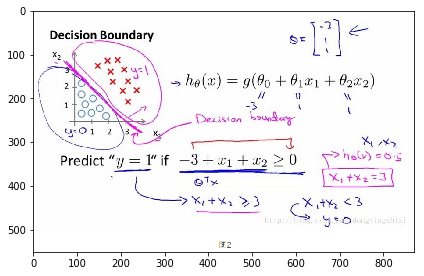

In [4]:
from skimage import io
img=io.imread('./logisitc_regression_1.png')
io.imshow(img)

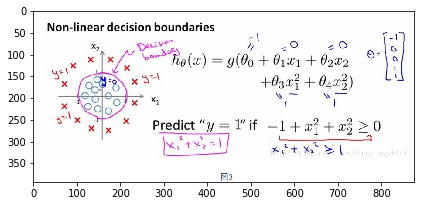

In [5]:
from skimage import io
img=io.imread('./logistic_regression_2.png')
io.imshow(img)

　　对于线性边界的情况,边界形式如下:

$$\theta_0 + \theta_1x_1 + \cdots + \theta_nx_n = \sum_{i=0}^n\theta_ix_i = \theta^Tx$$

　　构造预测函数为:

$$h_{\theta}(x)=g(\theta^Tx)=\frac{1}{1 + e^{-\theta^Tz}}$$

　　$h_{\theta}x$函数的值有特殊的函数,它表示结果取1的概率,因此对于输入x分类结果为1和0的概率分别为:

$$P(y=1\ |\ x;\theta) = h_{\theta}x$$

$$P(y=0\ |\ x;\theta) = 1 - h_{\theta}x$$

### 2.2构造Cost函数

　　Andrew NG在课程中直接给出了Cost函数及$J(\theta)$函数,但是并没有给出具体的解释,只是说明了用这个函数来衡量h函数预测好坏是合理的.

$$Cost(h_{\theta}(x),y) = \{_{-\log (1- h_{\theta}(x))\ if\ y=0}^{-\log(h_{\theta}(x))\ if\ y=1}$$

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)}),y^i)$$

　　实际上这里的$Cost$函数和$J(\theta)$函数是极大似然估计推导得到的.下面详细说明推导过程.

$$P(y|x;\theta) = (h_{\theta}(x))^y(1-h_{\theta}(x))^{1-y}$$

　　取似然函数为:

$$
  \begin{array}{}
  \quad l(\theta)& =& log L(\theta) \\
  &=& \sum_{i=1}^m y^{(i)}logh_{\theta}(x^{(i)}) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))
  \end{array}
$$

　　最大似然估计就是要求得使$l(\theta)$取最大值时的$\theta$,其实这里可以使用梯度上升求解,求得的$\theta$就是要求的最佳参数.但是,在Andrew Ng的课程中将$J(\theta)$取为,即:

$$J(\theta) = \frac{1}{m}l(\theta)$$

　　因为乘了一个负的系数$-\frac{1}{m}$,所以$J(\theta)$取最小值时的$\theta$为要求的最佳参数.

### 2.3梯度下降求$J(\theta)$的最小值

　　求$J(\theta)$的最小值可以使用梯度下降法,根据梯度下降法可得$\theta$的更新过程:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$$

　　式中$\alpha$为学习步长,下面来求偏导:

$$
  \begin{array}{}
  \quad \frac{\partial}{\partial \theta_j}J(\theta)& =& -\frac {1}{m}\sum_{i=1}^{m}(y^{(i)}\frac{1}{h_{\theta}(x^{(i)})}\frac{\partial}{\partial \theta_j}h_{\theta}(x^{(i)}) - (1-y^{(i)})\frac{1}{1\ -\ h_{\theta}(x^{(i)})}\frac{\partial}{\partial \theta_j}h_{\theta}(x^{(i)})) \\
  \\
  &=&-\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\frac{1}{g(\theta^Tx^{(i)})}\ -\ (1\ -\ y^{(i)})\frac{1}{1\ -\ g(\theta^Tx^{(i)})})\frac{\partial}{\partial \theta_j}g(\theta^Tx^{(i)}) \\
  \\
  &=& -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\frac{1}{g(\theta^Tx^{(i)})}\ -\ (1\ -\ y^{(i)})\frac{1}{1\ -\ g(\theta^Tx^{(i)})})\frac{\partial}{\partial \theta_j}g(\theta^Tx^{(i)}) \\
  \\
  &=&-\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}(1\ -\ g(\theta^Tx^{(i)}))\ -\ (1\ -\ y^{(i)})g(\theta^Tx^{(i)}))x^{(i)}_j \\
  \\
  &=&-\frac{1}{m}\sum_{i=1}^{m}(y^i\ -\ g(\theta^Tx^{(i)}))x^{(i)}_j \\
  \\
  &=&\frac{1}{m}\sum_{i=1}^{m}(\ h_{\theta}(x^{(i)})\ -\ y^{(i)})x^{(i)}_j
  \end{array}
$$

　　上式的求解过程中用到如下的公式:

$$
  \begin{array}{}
  \quad h_{\theta}(x) &=& \frac{1}{1 + e^{-\theta^Tx}} \\
  \\
  \frac{\partial}{\partial x}h_{\theta}(x) &=& h_{\theta}(x)(1 - h_{\theta}(x))x
  \end{array}
$$

　　因此,上式的更新过程可以写成:

$$\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}\ \ ,\ (j = 0 \cdots n)$$

　　因为式中$\theta$本来为一常量,所以$\frac{1}{m}$一般都会省略,所以最终的$\theta$更新过程为:

$$\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}\ \ ,\ (j=0,\cdots,n)$$

　　另外,补充一下,将2.2节中提到求的$l(\theta)$取最大值时的$\theta$也是一样的.

## 梯度下降过程向量化

　　关于$\theta$更新过程的vectorization, Andrew Ng的课程中只是一带而过,没有具体讲解.

　　约定训练数据的矩阵形式如下,$x$的每一行为一条训练样本,而一列为不同的特征取值:

$$
    \left[
    \begin{matrix}
    x^{(1)} \\
    x^{(2)} \\
    ... \\
    x^{(m)}
    \end{matrix}
    \right] =
    \left[
    \begin{matrix}
    x^{(1)}_0\ x^{(1)}_1\ ...\ x^{(1)}_n \\
    x^{(2)}_0\ x^{(2)}_1\ ...\ x^{(2)}_n \\
    ...\ ...\ ...\ ... \\
    x^{(m)}_0\ x^{(m)}_1\ ...\ x^{(m)}_n
    \end{matrix}
    \right]\ ,\ y=
    \left[
    \begin{matrix}
    y^{(1)} \\
    y^{(2)} \\
    ... \\
    y^{(m)}
    \end{matrix}
    \right]
$$

　　约定待求的参数$\theta$的矩阵形式为:

$$
\theta=
    \left[
    \begin{matrix}
    \theta_{0} \\
    \theta_{1} \\
    ... \\
    \theta_{n}
    \end{matrix}
    \right]
$$

　　先求$x\cdot\theta$并记为A:

$$
A\ =\ x\cdot\theta\ =
    \left[
    \begin{matrix}
    x^{(1)}_0\ x^{(1)}_1\ ...\ x^{(1)}_n \\
    x^{(2)}_0\ x^{(2)}_1\ ...\ x^{(2)}_n \\
    ...\ ...\ ...\ ... \\
    x^{(m)}_0\ x^{(m)}_1\ ...\ x^{(m)}_n
    \end{matrix}
    \right] \cdot
    \left[
    \begin{matrix}
    \theta_{0} \\
    \theta_{1} \\
    ... \\
    \theta_{n}
    \end{matrix}
    \right] = 
    \left[
    \begin{matrix}
    \theta_0x^{(1)}_0 + \theta_1x^{(1)}_1 + \cdots + \theta_nx^{(1)}_n \\ 
    \theta_0x^{(2)}_0 + \theta_1x^{(2)}_1 + \cdots + \theta_nx^{(2)}_n \\ 
    \cdots \\
    \theta_0x^{(m)}_0 + \theta_1x^{(m)}_1 + \cdots + \theta_nx^{(m)}_n 
    \end{matrix}
    \right]
$$

　　求$h_{\theta}(x) - y$并记为E:

$$
E = h_{\theta}(x) - y = 
    \left[
    \begin{matrix}
    g(A^{(1)} - y^{(1)}) \\
    g(A^{(2)} - y^{(2)}) \\
    \cdots \\
    g(A^{(m)} - y^{(m)}) \\
    \end{matrix}
    \right] = 
    \left[
    \begin{matrix}
    e^{(1)} \\
    e^{(2)} \\
    \cdots \\
    e^{(3)} \\
    \end{matrix}
    \right] = g(A) - y
$$

　　$g(A)$的参数A为一列向量,所以实现$g$函数时要支持列向量作为参数,并返回列向量.由上式可知$h_{\theta}(x)-y$可以由$g(A)-y$一次计算求得.

　　再来看一下$\theta$的更新过程,当$j=0$时:

$$
  \begin{array}{}
  \quad \theta_0 &:=& \theta_0 - \alpha \sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)} \\
  \\
  &=& \theta_0 - \alpha \sum_{i=1}^m e^{(i)}x_0^{(i)} \\
  \\
  &=& \theta_0 - \alpha(x_0^{(1)},x_0^{(2)},\cdots,x_0^{(m)})\cdot E
  \end{array}
$$

　　综合起来就是:

$$
 \left[
    \begin{matrix}
    \theta_{0} \\
    \theta_{1} \\
    ... \\
    \theta_{n}
    \end{matrix}
    \right] :=
     \left[
    \begin{matrix}
    \theta_{0} \\
    \theta_{1} \\
    ... \\
    \theta_{n}
    \end{matrix}
    \right] - \alpha \cdot
    \left[
    \begin{matrix}
    x^{(1)}_0\ x^{(1)}_1\ ...\ x^{(1)}_n \\
    x^{(2)}_0\ x^{(2)}_1\ ...\ x^{(2)}_n \\
    ...\ ...\ ...\ ... \\
    x^{(m)}_0\ x^{(m)}_1\ ...\ x^{(m)}_n
    \end{matrix}
    \right] \cdot E
$$

　　综上所述:vectorization后$\theta$更新的步骤如下:

　　(1)求$A = x\cdot\theta$
  
　　(2)求$E = g(A) - y$
  
　　(3)求$\theta := \theta - \alpha \cdot x^T \cdot E$